In [1]:
import pandas as pd

df_train = pd.read_csv('train_data.txt', sep=":::", names=['Title', 'Genre', 'Description'], engine = 'python')
df_train

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [2]:
df_test_solution = pd.read_csv('test_data_solution.txt', sep=":::", names=['Title', 'Genre', 'Description'], engine = 'python')
df_test_solution

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [29]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [30]:
df_train.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [31]:
df_train.duplicated().sum()

0

In [16]:
df_test_solution.duplicated().sum()

0

In [3]:
df_train.loc[:, 'Description'] = df_train['Description'].astype(str).str.lower()
df_test_solution.loc[:, 'Description'] = df_test_solution['Description'].astype(str).str.lower()

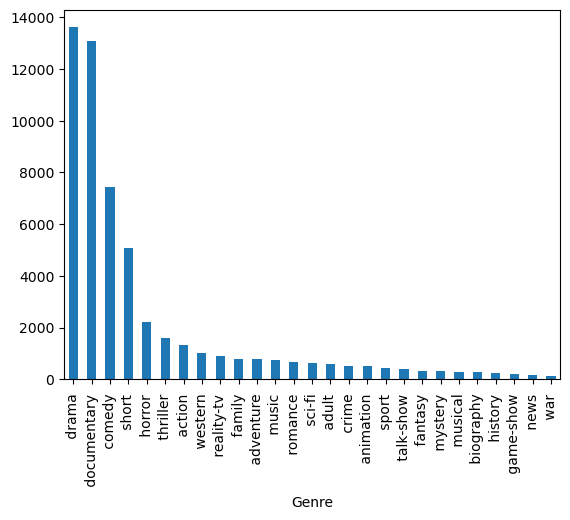

In [4]:
import matplotlib.pyplot as plt
genre_count = df_train.Genre.value_counts()
plt.figure()
plt.xlabel = 'Genre'
plt.ylabel = 'Nb of Movies'
plt.title='Distribution of Movies Genre'
genre_count.plot(kind= 'bar')
plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
V = TfidfVectorizer(stop_words= 'english', max_features=5000)
X_train_vec = V.fit_transform(df_train.Description)
X_test_vec = V.fit_transform(df_test_solution.Description)

#### Using Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, df_train.Genre)

LogisticRegression(max_iter=1000)

In [9]:
model.score(X_test_vec, df_test_solution.Genre)

0.2569741697416974

In [13]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_vec)
print(classification_report(df_test_solution.Genre, y_pred, zero_division=0))

               precision    recall  f1-score   support

      action        0.05      0.00      0.00      1314
       adult        0.00      0.00      0.00       590
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.20      0.22      0.21      7446
       crime        0.00      0.00      0.00       505
 documentary        0.31      0.47      0.38     13096
       drama        0.30      0.36      0.33     13612
      family        0.33      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       243
      horror        0.21      0.03      0.05      2204
       music        0.00      0.00      0.00       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00      0.00       318
        n

Using Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB
model_naive = MultinomialNB()
model_naive.fit(X_train_vec, df_train.Genre)

MultinomialNB()

In [11]:
model_naive.score(X_test_vec, df_test_solution.Genre)

0.2790959409594096

In [14]:
from sklearn.metrics import classification_report
y_pred = model_naive.predict(X_test_vec)
print(classification_report(df_test_solution.Genre, y_pred, zero_division=0))

               precision    recall  f1-score   support

      action        0.04      0.00      0.01      1314
       adult        0.00      0.00      0.00       590
   adventure        0.01      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.21      0.19      0.20      7446
       crime        0.00      0.00      0.00       505
 documentary        0.34      0.54      0.41     13096
       drama        0.28      0.46      0.35     13612
      family        0.04      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       243
      horror        0.27      0.05      0.08      2204
       music        0.00      0.00      0.00       731
     musical        0.00      0.00      0.00       276
     mystery        0.25      0.00      0.01       318
        n